<a href="https://colab.research.google.com/github/anhhahuynh/Excercise-AI/blob/main/AI_W9_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

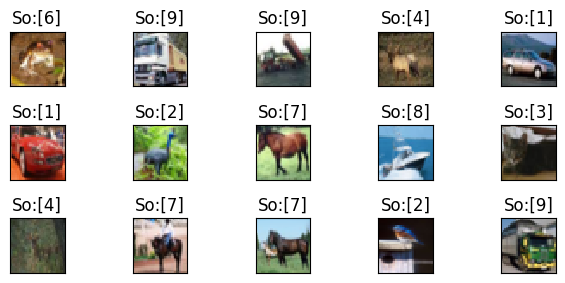

In [ ]:
for i in range(15):
  plt.subplot(5,5,i+1)  
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title("So:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

So nay la: [7]


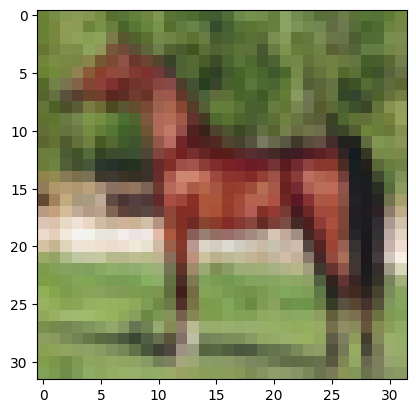

In [ ]:
import matplotlib.pyplot as plt
hinh= x_train[1905]  
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show
print("So nay la:",y_train[1905])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model= Sequential()
model.add(Dense(512, input_shape = (32*32*3,), activation = 'relu'))
model.add(Dense(10,activation= 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = x_train.reshape((50000,32*32*3,))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000,32*32*3,))
x_test = x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical  

y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)
y_test.shape

(10000, 10)

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Mất mát:',test_loss)
print('Độ chính xác:',test_acc)


Epoch 1/10
391/391 [==============================] - 14s 34ms/step - loss: 2.2792 - accuracy: 0.2622
Epoch 2/10
391/391 [==============================] - 13s 33ms/step - loss: 1.7946 - accuracy: 0.3576
Epoch 3/10
391/391 [==============================] - 13s 33ms/step - loss: 1.7095 - accuracy: 0.3914
Epoch 4/10
391/391 [==============================] - 14s 36ms/step - loss: 1.6516 - accuracy: 0.4142
Epoch 5/10
391/391 [==============================] - 13s 33ms/step - loss: 1.6120 - accuracy: 0.4297
Epoch 6/10
391/391 [==============================] - 13s 33ms/step - loss: 1.5798 - accuracy: 0.4392
Epoch 7/10
391/391 [==============================] - 13s 33ms/step - loss: 1.5519 - accuracy: 0.4507
Epoch 8/10
391/391 [==============================] - 13s 33ms/step - loss: 1.5318 - accuracy: 0.4579
Epoch 9/10
391/391 [==============================] - 13s 33ms/step - loss: 1.5134 - accuracy: 0.4648
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 1.5165 

In [ ]:
#model.save('test1.h5')
#model5=load_model('test1.h5')
#y_pred=model5.predict(x)

1/1 [==============================] - 0s 57ms/step


array([6])

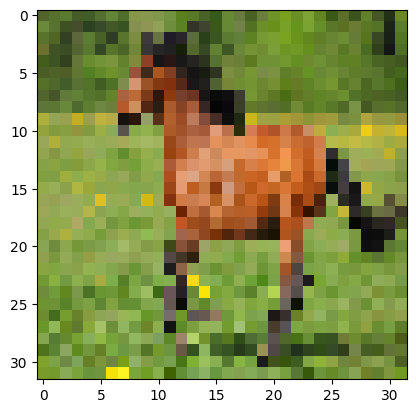

In [ ]:
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
import numpy as np
img = load_img('/content/ngựa.jpg',target_size=(32,32))
plt.imshow(img)

img= img_to_array(img)

img =img.reshape(1,32*32*3)
img = img.astype('float32')
img = img /255
np.argmax(model.predict(img),axis=-1)
